In [73]:
import numpy as np
import tweepy
import pandas as pd
import time, datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
API_key = "XXXXXX"
API_secret_key = "XXXXXX"
access_token = "XXXXXXXXXXXXXX"
access_token_secret = "XXXXXXXXXXX"

auth = tweepy.OAuthHandler(API_key, API_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True) #,wait_on_rate_limit=False

In [29]:
def tweets_web(target, date):
    cursor = tweepy.Cursor(
        api.search,
        q = target,
        since = date[0],
        until = date[1],
        show_user = True)
    
    tweets = []
    for tweet in cursor.items():
        text = str(tweet.text.encode("utf-8")).lower()
        ## query by both key words: e.g. privacy AND youtube
        if (target[0] in text) & (target[1] in text):
            tweets.append((target[1],tweet.created_at,text))
    tweetsdf = pd.DataFrame(tweets,columns=['Web','Datetime', 'Text'])
    

            # Converting dataframe to CSV
    tweetsdf.to_csv('{}-tweets.csv'.format(target[0]+"_"+target[1]))
        
    return tweetsdf

In [22]:
### query tweets and save to csv
for comp in ['youtube','google','facebook','apple','linkedin','tiktok','instagram']:
    tweets_comp = tweets_web(target = ('privacy',comp),date = ('2020-01-01', '2020-02-09'))

In [32]:
tweets_comp = pd.read_csv('privacy_youtube-tweets.csv')
for comp in ['google','facebook','apple','linkedin','tiktok','instagram']:
    temp = pd.read_csv('privacy_' + comp + '-tweets.csv')
    tweets_comp = pd.concat([tweets_comp,temp])

In [33]:
del tweets_comp['Unnamed: 0']
tweets_comp.columns

Index(['Web', 'Datetime', 'Text'], dtype='object')

In [36]:
tweets_comp['Datetime'] = pd.to_datetime(tweets_comp['Datetime'])
tweets_comp['Date'] = tweets_comp['Datetime'].apply(lambda x: x.date())
del tweets_comp['Datetime']

In [38]:
tweets_comp = tweets_comp.reset_index(drop=True)
tweets_comp.columns

Index(['Web', 'Text', 'Date'], dtype='object')

In [39]:
tweets_comp1 = tweets_comp.drop_duplicates().reset_index(drop=True)
tweets_comp.shape, tweets_comp1.shape

((6087, 3), (2757, 3))

In [40]:
privacy_count1 = pd.DataFrame(tweets_comp1.groupby(['Web']).count()['Text']).reset_index()
privacy_count1 = privacy_count1.sort_values(by='Text',ascending=False)

In [10]:
privacy_count = pd.DataFrame(tweets_comp.groupby(['Web']).count()['Text']).reset_index()
privacy_count = privacy_count.sort_values(by='Text',ascending=False)

In [61]:
privacy_count.columns = ['Web','Text_Count']
privacy_count1.columns = ['Web','Unique_Text_Count']

In [74]:
privacy_count_summary = pd.merge(privacy_count,privacy_count1, on='Web',how = 'left')
privacy_count_summary['Prop_replicate_Text'] = np.round(1 - privacy_count_summary.Unique_Text_Count
                                                        /privacy_count_summary.Text_Count,2)
privacy_count_summary

,Web,Text_Count,Unique_Text_Count,Prop_replicate_Text
0,facebook,4497,1653,0.63
1,google,720,504,0.30
2,youtube,247,129,0.48
3,apple,243,213,0.12
4,instagram,228,129,0.43
5,tiktok,96,88,0.08
6,linkedin,56,41,0.27


## Number of privacy related tweets from 02/01/2020 - 02/09/2020:
### Much more privacy related tweets are about facbook, then google and youtube. 

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


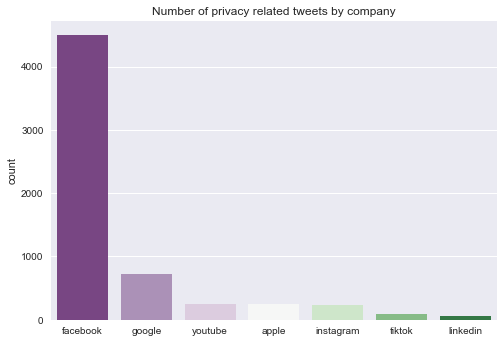

In [75]:
ax = sns.barplot('Web','Text_Count',data = privacy_count_summary,palette='PRGn')
ax.set(xlabel='', ylabel='count')
ax.set_title('Number of privacy related tweets by company')
plt.show()

## Proportion of tweets that are non-original, e.g. belongs to retweets?
### About 63% facbook, privacy related tweets are not original, maybe belongs to retweets. Even though instagram has much less privacy related tweets, more than 40% of them are not original. This tells us that privacy for facbook related products get some people's attention easier. 
### About half Youtube privacy related tweets are also not original. 
### Privacy in Apple hasn't got as much attention as facebook and youtube. 

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


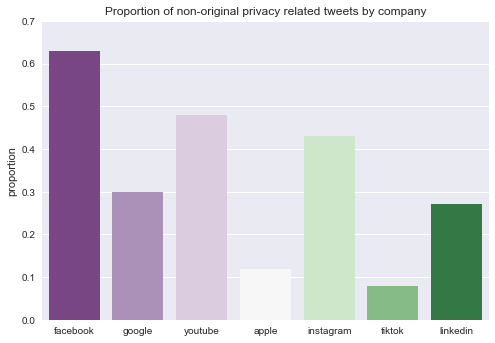

In [81]:
ax = sns.barplot('Web','Prop_replicate_Text',data = privacy_count_summary,palette='PRGn')
ax.set(xlabel='', ylabel='proportion')
ax.set_ylim(0,0.7)
ax.set_title('Proportion of non-original privacy related tweets by company')
plt.show()

## Next: Sentiment analysis for privacy related tweets